In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 344.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.2 MB/s eta 0:00:00
   

In [2]:
import pycaret

In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [4]:
pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

iris = fetch_ucirepo(id=53)

X = iris.data.features
y = iris.data.targets

print(iris.metadata)

print(iris.variables)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [7]:
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [8]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(X)

,Description,Value
0,Session id,993
1,Original data shape,"(150, 4)"
2,Transformed data shape,"(150, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5526,560.3999,0.6623,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4951,527.8353,0.7642,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4885,494.0944,0.8062,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

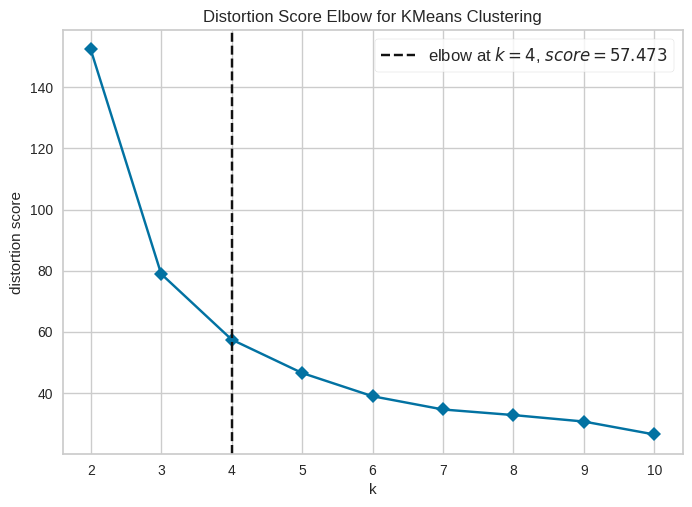

In [10]:
setup(X, verbose=False)
r1 = []
r2 = []
r3 = []

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(X)
r1.append(silhouette_score(X,labels))
r1.append(calinski_harabasz_score(X,labels))
r1.append(davies_bouldin_score(X,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(X)
r2.append(silhouette_score(X,labels))
r2.append(calinski_harabasz_score(X,labels))
r2.append(davies_bouldin_score(X,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(X)
r3.append(silhouette_score(X,labels))
r3.append(calinski_harabasz_score(X,labels))
r3.append(davies_bouldin_score(X,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4557,238.7768,0.8341,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3850,206.0335,0.8742,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3443,202.0857,0.9475,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

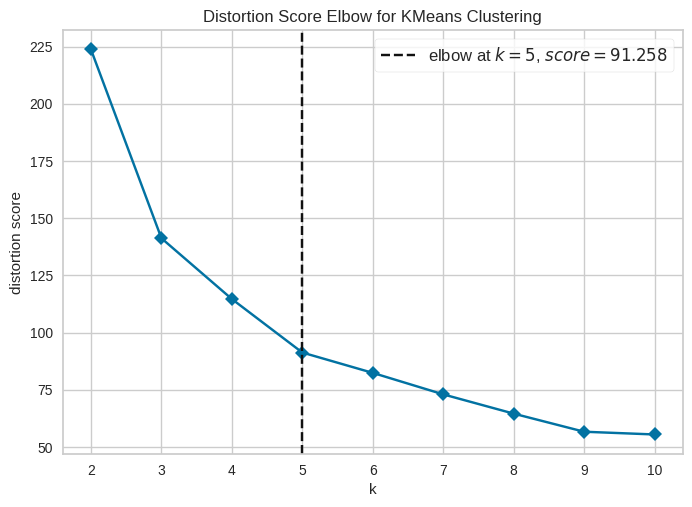

In [11]:
setup(X, normalize = True, normalize_method = 'zscore', verbose=False)
r4 = []
r5 = []
r6 = []
print("Normalized\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(X)
r4.append(silhouette_score(X,labels))
r4.append(calinski_harabasz_score(X,labels))
r4.append(davies_bouldin_score(X,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(X)
r5.append(silhouette_score(X,labels))
r5.append(calinski_harabasz_score(X,labels))
r5.append(davies_bouldin_score(X,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(X)
r6.append(silhouette_score(X,labels))
r6.append(calinski_harabasz_score(X,labels))
r6.append(davies_bouldin_score(X,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

PCA

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5526,560.4000,0.6623,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4978,529.3983,0.7806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4937,491.0789,0.8132,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

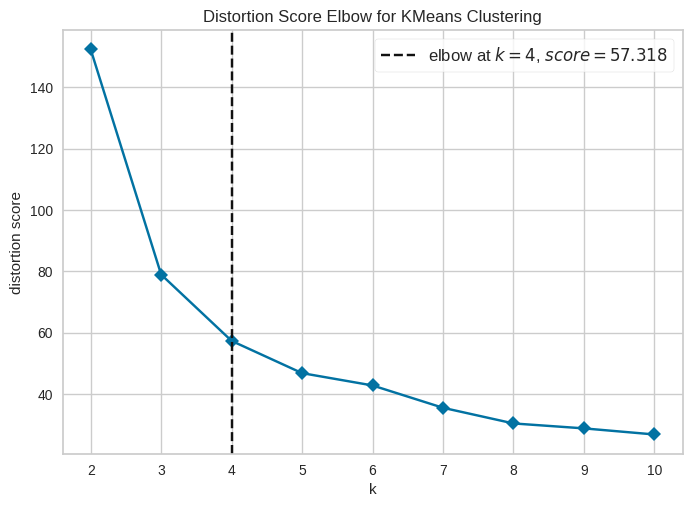

In [13]:
setup(X, pca = True, pca_method = 'linear', verbose=False)
r7 = []
r8 = []
r9 = []
r10 = []
r11 = []
r12 = []

print("PCA\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(X)
r10.append(silhouette_score(X,labels))
r10.append(calinski_harabasz_score(X,labels))
r10.append(davies_bouldin_score(X,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(X)
r11.append(silhouette_score(X,labels))
r11.append(calinski_harabasz_score(X,labels))
r11.append(davies_bouldin_score(X,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(X)
r12.append(silhouette_score(X,labels))
r12.append(calinski_harabasz_score(X,labels))
r12.append(davies_bouldin_score(X,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')